In [1]:
import pandas as pd

In [2]:
def min_edit_distance(s1, s2):
    """
    Tính khoảng cách chỉnh sửa (Levenshtein distance) giữa hai từ s1 và s2.
    Hỗ trợ tiếng Việt có dấu, đa ký tự.

    Trả về: số bước chỉnh sửa tối thiểu để biến s1 thành s2.
    """
    len_s1 = len(s1)
    len_s2 = len(s2)

    # Khởi tạo ma trận khoảng cách
    dp = [[0] * (len_s2 + 1) for _ in range(len_s1 + 1)]

    # Khoảng cách từ "" đến s1 hoặc s2
    for i in range(len_s1 + 1):
        dp[i][0] = i
    for j in range(len_s2 + 1):
        dp[0][j] = j

    # Tính khoảng cách
    for i in range(1, len_s1 + 1):
        for j in range(1, len_s2 + 1):
            cost = 0 if s1[i-1] == s2[j-1] else 1

            dp[i][j] = min(
                dp[i-1][j] + 1,      # xóa
                dp[i][j-1] + 1,      # thêm
                dp[i-1][j-1] + cost  # thay thế
            )
    # print(dp)
    return dp[len_s1][len_s2]

In [3]:
print(min_edit_distance("nhận", "nhân"))  # → 1
print(min_edit_distance("nhan", "cảh"))  # → 1
print(min_edit_distance("công", "cung"))  # → 1
print(min_edit_distance("công", "công"))  # → 0

1
4
1
0


In [4]:
test = pd.read_csv("/kaggle/input/preprocessing/test.csv")
test = test[['text', 'preprocess', 'correct_text']]
test

,text,preprocess,correct_text
0,"Thông qua công tác tuyên truyền, vận động này ...","thông qua công tác tuyên truyền, vận động này ...","Thông qua công tác tuyên truyền, vận động này ..."
1,"Do đó, doanh nghiệp cần chú trọng đến yếu tố n...","do đó, doanh nghiệp cần chú trọng đến yếu tố n...","Do đó, doanh nghiệp cần chú trọng đến yếu tố n..."
2,Giữ được chỉ số này không giam mà còn tăng thê...,giữ được chỉ số này không giam mà còn tăng thê...,Giữ được chỉ số này không giảm mà còn tăng thê...
3,Đúng trước thực tế này đòi hỏi chúng ta cần ph...,đúng trước thực tế này đòi hỏi chúng ta cần ph...,Đứng trước thực tế này đòi hỏi chúng ta cần ph...
4,Trình độ học vấn của nhân viên được tuyển dụng...,trình độ học vấn của nhân viên được tuyển dụng...,Trình độ học vấn của nhân viên được tuyển dụng...
...,...,...,...
8962,"Tuy nhiên, khi nói đến E-Learning, các phương ...","tuy nhiên, khi nói đến e-learning, các phương ...","Tuy nhiên, khi nói đến E-Learning, các phương ..."
8963,Đứng trước những hành vi đi ngược lại với đạo ...,đứng trước những hành vi đi ngược lại với đạo ...,Đứng trước những hành vi đi ngược lại với đạo ...
8964,Quan điểm biện chứng của chù nghĩa Mác - Lênin...,quan điểm biện chứng của chù nghĩa mác - lênin...,Quan điểm biện chứng của chủ nghĩa Mác - Lênin...
8965,"Đối với biểu đồ Histogram, nếu giá trị trung b...","đối với biểu đồ histogram, nếu giá trị trung b...","Đối với biểu đồ Histogram, nếu giá trị trung b..."


In [5]:
train = pd.read_csv("/kaggle/input/preprocessing/train.csv")
train

,text,correct_text
0,Chây ì nộp phạt nguội.,Chây ì nộp phạt nguội.
1,Chây ì ngộp phạt nguội.,Chây ì nộp phạt nguội.
2,Chây i nộp phạt ngội.,Chây ì nộp phạt nguội.
3,Hàng chục ngàn phươngg tiện bị ghi hình iv phạ...,Hàng chục ngàn phương tiện bị ghi hình vi phạm...
4,Hàng chục ngàn phương tiệng bị ghy hình vi pha...,Hàng chục ngàn phương tiện bị ghi hình vi phạm...
...,...,...
4980399,Phó thủ tướngg cũng yêu cầu hoàn thành cổ phầc...,Phó thủ tướng cũng yêu cầu hoàn thành cổ phần ...
4980400,Phó thủ tướng cũng Iu cầu hoờn thành cổ phần ó...,Phó thủ tướng cũng yêu cầu hoàn thành cổ phần ...
4980401,Phó thũ tướngx cũng yêu cầu hoàn thành cổ phần...,Phó thủ tướng cũng yêu cầu hoàn thành cổ phần ...
4980402,Pho thủ tướng cũng iu cầu hoàn thàh cổ phần hó...,Phó thủ tướng cũng yêu cầu hoàn thành cổ phần ...


In [6]:
unique_correct_texts = pd.read_csv('/kaggle/input/preprocessing/unique_correct_texts.csv')
unique_correct_texts

,correct_text
0,Cung cấp những thông tin về tình hình kinh tế ...
1,"Đảng, Nhà nước Việt Nam luôn coi trọng yếu tố ..."
2,Việc giảng dạy mang lại cho hs những kiến thức...
3,Kết quả nghiên cứu cho thấy Môi trường giáo dụ...
4,Ứng dụng môi trường công nghệ đến các hoạt độn...
...,...
9326,Cấp trên của Giám đốc điều hành là Hội đồng qu...
9327,"Theo nghĩa hẹp, nợ công bao gồm nghĩa vụ nợ củ..."
9328,"Cụ thể, trong phần nội dung sẽ có sự tập trung..."
9329,Ví dụ khi đọc bài thơ Mẹ nếu câu cuối Mẹ là ng...


## 1. Tiền xử lý dữ liệu
- Chuẩn hóa các câu đúng (lowercase, loại bỏ ký tự không cần thiết).

- Tách từ và sinh ra mô hình 3-gram từ tập văn bản đúng.

- Tạo tập từ vựng (vocab) gồm tất cả các từ đã xuất hiện.



In [7]:
import re
import pandas as pd

def clean_punctuation(text):
    # 0. Handle NaN values (already present)
    if pd.isnull(text):
        return text
    
    # Ensure text is a string (important for mixed data types in a DataFrame column)
    text = str(text)

    # --- Punctuation Normalization (Order matters!) ---

    # 1. Normalize ellipses: Ensure all sequences of 2 or more periods become '...'
    #    e.g., ".." -> "...", "...." -> "..."
    text = re.sub(r'\.{2,}', '...', text)

    # 2. Handle numbers with periods/commas (e.g., 1 . 2 -> 1.2, 1,000 -> 1,000)
    #    This is crucial to do early, before general space removal around punctuation.
    text = re.sub(r'(?<=\d)\s*([.,])\s*(?=\d)', r'\1', text)

    # 3. Remove quotation marks (single and double) entirely as per requirement #6
    #    This simplifies later rules as we don't need to account for them.
    text = re.sub(r'[\'"]', '', text)

    # 4. Consolidate repeated punctuation (e.g., '!!' -> '!', '???' -> '?')
    #    This excludes ellipses, which were handled in step 1.
    #    If you want to preserve '!!!' as '!!!', remove this rule or modify it.
    text = re.sub(r'([.,!?;:])\1+', r'\1', text)
    
    # 5. Standardize spacing around punctuation and parentheses
    
    # 5.1 Remove any space immediately before common punctuation (.,!?:;) and ellipses (...)
    #    e.g., "hello ." -> "hello.", "word ..." -> "word..."
    text = re.sub(r'\s+([.,!?:;])', r'\1', text)
    text = re.sub(r'\s+(\.\.\.)', r'\1', text) # Specific for ellipses

    # 5.2 Add space after punctuation (except when it's part of a number)
    text = re.sub(r'(?<!\d)([.,])(?!\d)(?=\S)', r'\1 ', text)
    text = re.sub(r'(?<=[!?;:])(?=\S)', r' \g<0>', text)  # safe spacing for other punctuations
    text = re.sub(r'(\.\.\.)(?=\S)', r'\1 ', text)  # ellipsis spacing

    # 5.3 Handle parentheses spacing (section #5 in original)
    #    Remove any spaces immediately inside or around parentheses:
    #    e.g., " ( hello ) " -> "(hello)", " (hello" -> "(hello"
    text = re.sub(r'\s*([()])\s*', r'\1', text)
    #    Add space before opening parenthesis if preceded by a word character:
    #    e.g., "word(content)" -> "word (content)"
    text = re.sub(r'(?<=\w)\(', ' (', text)
    #    Add space after closing parenthesis if followed by a word character:
    #    e.g., "(content)word" -> "(content) word"
    text = re.sub(r'\)(?=\w)', ') ', text)

    # --- Final Cleanup ---

    # 6. Reduce multiple spaces to single spaces (section #7 in original)
    text = re.sub(r'\s{2,}', ' ', text)

    # 7. Strip leading/trailing whitespace (already present)
    return text.strip()

In [8]:
clean_punctuation("13,5 triêu")

'13,5 triêu'

In [9]:
import re
from collections import defaultdict, Counter
from nltk.tokenize import word_tokenize
import nltk
import string

nltk.download('punkt')


import re

def clean_text(text):
    # Thay thế URL trước
    text = re.sub(r'https?://\S+|www\.\S+', '<url>', text)

    # Thay thế emoji bằng <emoji>
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F700-\U0001F77F"  # alchemical
        u"\U0001F780-\U0001F7FF"  # geometric
        u"\U0001F800-\U0001F8FF"  # arrows
        u"\U0001F900-\U0001F9FF"  # supplemental symbols
        u"\U0001FA00-\U0001FA6F"  # chess
        u"\U0001FA70-\U0001FAFF"  # symbols extended
        u"\u2600-\u26FF"          # misc symbols
        u"\u2700-\u27BF"          # dingbats
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub('<emoji>', text)

    # Thay thế định dạng ngày (dd/mm/yyyy hoặc yyyy/mm/dd)
    text = re.sub(r'\b\d{1,2}[-/]\d{1,2}[-/]\d{2,4}\b', '<date>', text)
    text = re.sub(r'\b\d{4}[-/]\d{1,2}[-/]\d{1,2}\b', '<date>', text)

    # Thay thế thời gian (hh:mm hoặc hh:mm:ss)
    text = re.sub(r'\b\d{1,2}:\d{2}(:\d{2})?\b', '<time>', text)

    # Thay thế số (gồm số thập phân và số nguyên)
    text = re.sub(r'\d+([.,]\d+)?', '<num>', text)

    return text

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
import re
from nltk.tokenize import word_tokenize

def custom_tokenize(text):
    # 1. Tìm các token đặc biệt dạng <...>
    special_tokens = list(set(re.findall(r'<[^<> ]+>', text)))
    token_map = {token: f"___SPECIALTOKEN{i}___" for i, token in enumerate(special_tokens)}

    # 2. Thay thế token đặc biệt bằng placeholder
    for orig, placeholder in token_map.items():
        text = text.replace(orig, placeholder)

    # 3. Tách các placeholder nếu dính vào từ hoặc ký tự đặc biệt
    for placeholder in token_map.values():
        text = re.sub(rf'({re.escape(placeholder)})([^\W_]+)', r'\1 \2', text)
        text = re.sub(rf'([^\W_]+)({re.escape(placeholder)})', r'\1 \2', text)
        text = re.sub(rf'({re.escape(placeholder)})([/%°\-+=±≥<>\.])', r'\1 \2', text)
        text = re.sub(rf'([/%°\-+=±≥<>\.])({re.escape(placeholder)})', r'\1 \2', text)

    # 4. TÁCH CÁC DẤU NHƯ / - … ... THÀNH TOKEN RIÊNG
    # Chèn khoảng trắng quanh các ký hiệu phân tách
    text = re.sub(r'([/\-+=±%°₫.<>\[\]…])', r' \1 ', text)
    text = re.sub(r'\.\.\.', ' ... ', text)  # tách "..." riêng
    text = re.sub(r'…', ' … ', text)        # tách dấu ba chấm unicode riêng

    # 5. Token hóa
    tokens = word_tokenize(text)

    # 6. Thay lại placeholder bằng token đặc biệt gốc
    reverse_map = {v: k for k, v in token_map.items()}
    tokens = [reverse_map.get(t, t) for t in tokens]

    return tokens

In [11]:
text = "Ngày 12/06/2024 lúc 08:45, 30-days giá là 13.78triệu đồng 😂 www.example.com 12/3"
cleaned = clean_text(text)
print("Sau khi clean:", cleaned)
tokens = custom_tokenize(cleaned)
print("Token:", tokens)

Sau khi clean: Ngày <date> lúc <time>, <num>-days giá là <num>triệu đồng <emoji> <url> <num>/<num>
Token: ['Ngày', '<date>', 'lúc', '<time>', ',', '<num>', '-', 'days', 'giá', 'là', '<num>', 'triệu', 'đồng', '<emoji>', '<url>', '<num>', '/', '<num>']


In [12]:
from collections import defaultdict, Counter

def preprocess(texts):
    trigrams = defaultdict(Counter)
    bigrams = defaultdict(Counter)
    unigrams = Counter()
    vocab = set()

    for text in texts:
        text = clean_punctuation(text)
        text = clean_text(text)
        tokens = custom_tokenize(text.lower())
        tokens = ['<start1>', '<start2>'] + tokens + ['<end1>', '<end2>']
        vocab.update(tokens)

        for i in range(len(tokens)):
            unigrams[tokens[i]] += 1
            if i >= 1:
                w1, w2 = tokens[i-1], tokens[i]
                bigrams[w1][w2] += 1
            if i >= 2:
                context = (tokens[i-2], tokens[i-1])
                trigrams[context][tokens[i]] += 1

    return trigrams, bigrams, unigrams, vocab

## 2. Tính toán xác suất chuyển tiếp (Transition Probability)
- Dựa trên mô hình 3-gram: P(w₃ | w₁, w₂)

- Với mỗi bộ ba liên tiếp (w₁, w₂, w₃) trong văn bản đúng, đếm tần suất xuất hiện.

- Chuẩn hóa tần suất để có xác suất chuyển tiếp giữa các từ đúng theo ngữ cảnh.

In [13]:
def get_transition_prob(trigrams, bigrams, unigrams, D=0.9):
    transition_prob = {}
    continuation_counts = defaultdict(set)
    bigram_counts = defaultdict(int)

    for (w1, w2), trigram_counter in trigrams.items():
        for w3 in trigram_counter:
            continuation_counts[w3].add((w1, w2))
            bigram_counts[(w1, w2)] += trigram_counter[w3]

    continuation_prob = {
        w: len(continuation_counts[w]) / len(bigram_counts)
        for w in continuation_counts
    }

    bigram_prob = {}
    bigram_cont_counts = defaultdict(set)

    for w1, w2_counter in bigrams.items():
        for w2 in w2_counter:
            bigram_cont_counts[w2].add(w1)

    total_bigram_conts = sum(len(v) for v in bigram_cont_counts.values())

    unigram_prob = {
        w: len(bigram_cont_counts[w]) / total_bigram_conts
        for w in bigram_cont_counts
    }

    for w1, w2_counter in bigrams.items():
        total = sum(w2_counter.values())
        if total == 0:
            continue
        num_types = len(w2_counter)
        for w2, count in w2_counter.items():
            prob = max(count - D, 0) / total
            prob += (D * num_types / total) * unigram_prob.get(w2, 1e-8)
            bigram_prob[(w1, w2)] = prob

    for (w1, w2), trigram_counter in trigrams.items():
        total = sum(trigram_counter.values())
        if total == 0:
            continue
        num_types = len(trigram_counter)
        for w3, count in trigram_counter.items():
            first_term = max(count - D, 0) / total
            backoff_weight = (D * num_types) / total
            backoff_prob = bigram_prob.get((w2, w3), unigram_prob.get(w3, 1e-8))
            transition_prob[(w1, w2, w3)] = first_term + backoff_weight * backoff_prob

    return transition_prob

## 3. Tính xác suất phát xạ (Emission Probability)
- Mỗi từ sai (quan sát được) có thể phát ra từ một số từ đúng.

- Dựa vào Minimum Edit Distance giữa từ sai và từng từ đúng trong từ điển.

- Những từ đúng có khoảng cách nhỏ nhất được coi là ứng viên thay thế hợp lý, và được gán xác suất tỷ lệ nghịch với khoảng cách.

In [14]:
def get_emission_prob(observed_word, vocab, max_distance=5):
    target_distance = min(len(observed_word) - 1, max_distance)
    target_distance = max(1, target_distance)
    
    candidates = []
    for word in vocab:
        dist = min_edit_distance(observed_word, word)
        if dist <= target_distance:
            candidates.append((word, dist))

    if not candidates:
        # Dự phòng: nếu không có ứng viên đúng khoảng cách thì fallback
        candidates = [(word, min_edit_distance(observed_word, word)) for word in vocab
                      if min_edit_distance(observed_word, word) <= max_distance]

        if not candidates:
            return {}

    # Tính xác suất ngược lại với khoảng cách
    probs = {}
    for word, dist in candidates:
        prob = 1 / (1 + dist)
        probs[word] = prob

    # Chuẩn hóa
    total = sum(probs.values())
    for word in probs:
        probs[word] /= total

    return probs

## 4. Thuật toán Viterbi (Giải mã chuỗi tối ưu)
- Với chuỗi từ quan sát (câu cần sửa), tìm chuỗi từ đúng (ẩn) sao cho:
    - Xác suất tổng (transition * emission) là lớn nhất.
- Áp dụng Viterbi để tìm dãy từ đúng có xác suất cao nhất, từng bước một, sử dụng:
    - Các từ ứng viên ở mỗi bước (từ có khoảng cách edit nhỏ với từ đầu vào).
    - Xác suất chuyển tiếp giữa các từ ứng viên liên tiếp (3-gram).

In [15]:
from math import log

def viterbi(observed, vocab, transition_prob, epsilon=1e-8):
    observed = ['<start1>', '<start2>'] + observed + ['<end1>', '<end2>']
    T = len(observed)
    V = [{} for _ in range(T)]
    path = {}

    emis0 = get_emission_prob(observed[0], vocab)
    emis1 = get_emission_prob(observed[1], vocab)
    emis2 = get_emission_prob(observed[2], vocab)

    for w1 in emis0:
        for w2 in emis1:
            for w3 in emis2:
                trigram = (w1, w2, w3)
                trans_prob = transition_prob.get(trigram, epsilon)
                emis_prob = emis2.get(w3, epsilon)

                prob = log(emis0.get(w1, epsilon)) \
                     + log(emis1.get(w2, epsilon)) \
                     + log(trans_prob) \
                     + log(emis_prob)

                V[2][(w2, w3)] = prob
                path[(w2, w3)] = [w1, w2, w3]

    for t in range(3, T):
        emis_probs = get_emission_prob(observed[t], vocab)
        new_path = {}
        for w3 in emis_probs:
            max_prob = float('-inf')
            best_prev = None
            for (w1, w2), seq in path.items():
                trigram = (w1, w2, w3)
                trans_prob = transition_prob.get(trigram, epsilon)
                emis_prob = emis_probs.get(w3, epsilon)
                prev_prob = V[t-1].get((w1, w2), float('-inf'))
                if prev_prob == float('-inf'):
                    continue
                prob = prev_prob + log(trans_prob) + log(emis_prob)
                if prob > max_prob:
                    max_prob = prob
                    best_prev = (w1, w2)
            if best_prev:
                V[t][(best_prev[1], w3)] = max_prob
                new_path[(best_prev[1], w3)] = path[best_prev] + [w3]
        path = new_path

    final_step = T - 1
    final = max(path.values(), key=lambda seq: V[final_step].get((seq[-2], seq[-1]), float('-inf')))
    return final

## 5. Tái tạo câu đã sửa
- Chuỗi từ đúng tìm được là kết quả sau khi sửa.

- Ghép lại các từ theo đúng thứ tự để tạo thành câu đã sửa lỗi.

In [16]:
import re

def clean_text_with_mapping(text):
    replacements = {
        "<url>": [],
        "<emoji>": [],
        "<date>": [],
        "<time>": [],
        "<num>": [],
    }

    # Danh sách các pattern với placeholder ưu tiên
    patterns = [
        (r'https?://\S+|www\.\S+', "<url>"),
        ("[" + u"\U0001F600-\U0001F64F"
             + u"\U0001F300-\U0001F5FF"
             + u"\U0001F680-\U0001F6FF"
             + u"\U0001F1E0-\U0001F1FF"
             + u"\u2600-\u26FF"
             + u"\u2700-\u27BF" + "]", "<emoji>"),
        (r'\b\d{1,2}[-/]\d{1,2}[-/]\d{2,4}\b', "<date>"),   # dd/mm/yyyy hoặc dd-mm-yyyy
        (r'\b\d{4}[-/]\d{1,2}[-/]\d{1,2}\b', "<date>"),     # yyyy/mm/dd hoặc yyyy-mm-dd
        (r'\b\d{1,2}:\d{2}(?::\d{2})?\b', "<time>"),        # hh:mm hoặc hh:mm:ss
        (r'\d+(?:[.,]\d+)?', "<num>"),                     # số thực hoặc số nguyên
    ]

    # Ghi lại vị trí đã thay để tránh chồng lặp
    replaced = [False] * len(text)
    new_text = ""
    last_pos = 0
    matches = []

    for pattern, placeholder in patterns:
        for match in re.finditer(pattern, text):
            start, end = match.start(), match.end()
            if any(replaced[start:end]):
                continue  # Tránh thay chồng

            matches.append((start, end, match.group(), placeholder))
            for i in range(start, end):
                replaced[i] = True  # Đánh dấu đã xử lý

    # Sắp xếp lại theo thứ tự xuất hiện
    matches.sort()
    last_pos = 0
    for start, end, original, placeholder in matches:
        new_text += text[last_pos:start]
        new_text += placeholder
        replacements[placeholder].append(original)
        last_pos = end

    new_text += text[last_pos:]
    return new_text, replacements

In [17]:
text = "Hôm nay là 2024-12-01, mai là 02/12/2024 và 14:30. Website là https://openai.com và giá là 12.345,67₫ 😊"
cleaned, repl = clean_text_with_mapping(text)

print("➡ Văn bản sau khi clean:", cleaned)
print("➡ Mapping:")
for k, v in repl.items():
    print(f"  {k}: {v}")

➡ Văn bản sau khi clean: Hôm nay là <date>, mai là <date> và <time>. Website là <url> và giá là <num>,<num>₫ <emoji>
➡ Mapping:
  <url>: ['https://openai.com']
  <emoji>: ['😊']
  <date>: ['2024-12-01', '02/12/2024']
  <time>: ['14:30']
  <num>: ['12.345', '67']


In [18]:
clean_text(text)

'Hôm nay là <date>, mai là <date> và <time>. Website là <url> và giá là <num>,<num>₫ <emoji>'

In [19]:
from collections import defaultdict

def restore_tokens(tokens, replacements):
    # Đếm số lần đã dùng của mỗi placeholder
    counts = {k: 0 for k in replacements}

    restored = []
    for token in tokens:
        if token in replacements:
            index = counts[token]
            if index < len(replacements[token]):
                restored.append(replacements[token][index])
                counts[token] += 1
            else:
                # Trường hợp placeholder nhiều hơn số bản ghi, giữ nguyên
                restored.append(token)
        else:
            restored.append(token)

    return restored

In [20]:
def correct_text(input_text, vocab, transition_prob):
    input_text = clean_punctuation(input_text.lower())
    cleaned_text, replacements = clean_text_with_mapping(input_text)
    tokens = custom_tokenize(cleaned_text)

    corrected_tokens = viterbi(tokens, vocab, transition_prob)
    corrected_tokens = corrected_tokens[2:-2]  # remove start/end markers
    restored = restore_tokens(corrected_tokens, replacements)
    corrected_text = ' '.join(restored)
    return clean_punctuation(corrected_text)

In [21]:
# Step 1: huấn luyện với tập văn bản đúng
texts = list(unique_correct_texts['correct_text'])
trigrams, bigrams, unigrams, vocab = preprocess(texts)
transition_prob = get_transition_prob(trigrams, bigrams, unigrams, D=0.5)
print(len(trigrams))
print(vocab)

82696
{'tiệt', 'coworking', 'thượng', 'khoai', 'rè', 'lần', 'kìm', 'marker', 'rộn', 'tiếc', 'nẵng', 'hổng', 'hiếm', 'lon', 'ha', 'gvcn', 'npm', 'maketing', 'on', 'buồn', 'nlđ', 'dục', 'bmw', 'chân', 'coliform', 'cracking', 'tụt', 'chinsu', 'knxk', 'diện', 'sdn', '–', 'sao', 'đưa', 'francisco', 'pos', 'ân', 'nghìn', 'tục', 'york', 'suốt', 'top', 'vớt', 'huyễn', 'sổ', 'dạo', 'drx', 'ống', 'da', 'bỏ', 'eo', 'lang', 'đấu', 'mômen', 'meyer', 'cipo', 'táp', 'bảo', 'syed', 'ứng', 'nhôm', 'thần', 'factors', 'bó', 'legal', 'xu', 'tháng', 'sony', 'katsuma', 'tbdh', 'vang', 'dẫm', 'ghế', 'chứa', 'composite', 'interface', 'pump', 'ốt', 'nại', 'vôi', 'xà', 'mỉm', 'xim', 'application', 'ổ', 'security', 'cpich', 'phai', 'úng', 'hết', 'is', 'nghề', 'ngắn', 'cvđc', 'vitell', 'nghênh', 'dùng', 'wto', 'gam', 'chốc', 'thách', 'header', 'ta', 'axetic', 'mô', 'hạt', 'gà', 'sự', 'ctg', 'lương', 'calculation', 'miêu', 'mét', 'bọt', 'đòn', 'đan', 'phó', 'chứ', '±', 'vắng', 'dt', 'bẵng', 'võ', 'kl', 'machine', 

In [22]:
# Test correction
wrong_text = "thôngg qua công tác tuyên truyeenf, van động này phu huynh sẽ hiểu rỏ hơn tầm quan trọng của việc giáo duc."
corrected = correct_text(wrong_text, vocab, transition_prob)

print(corrected)

thông qua công tác tuyên truyền, vận động này phụ huynh sẽ hiểu rõ hơn tầm quan trọng của việc giáo dục.


In [23]:
wrong_text = "quan điểm biện chứng của chù nghĩa mác - lênin không chỉ khẳng định tính khách quan, tính phổ biến của các mối liên hệ mà còn nhấn mạnh tính phong phú, đa dạng của các mối liên hệ."
corrected = correct_text(wrong_text, vocab, transition_prob)

In [24]:
print(corrected)

quan điểm biện chứng của chủ nghĩa mác - lênin không chỉ khẳng định tính khách quan, tính phổ biến của các mối liên hệ mà còn nhấn mạnh tính phong phú, đa dạng hóa các mối liên hệ.


In [25]:
wrong_text = "đối với biểu đồ histogram, nếu giá trị trung bình mean gần bằng 0, độ lệch chuẩn gần bằng 1 và đường cong phân phối có hình dạng chuông thì có thể khẳng định phân phối là xếp xỉ chuẩn, giả định phân phối chuẩn của phần dư không bị vi phạm."
corrected = correct_text(wrong_text, vocab, transition_prob)

In [26]:
print(corrected)

đối với biểu đồ histogram, nếu giá trị trung bình mean gần bằng 0, độ lệch chuẩn gần bằng 1 và đường cong phân phối có hình dạng chuông thì có thể khẳng định phân phối là xấp xỉ chuẩn, giả định phân phối chuẩn của phần dư không bị vi phạm.


## Đánh giá trên tập test

In [27]:
test

,text,preprocess,correct_text
0,"Thông qua công tác tuyên truyền, vận động này ...","thông qua công tác tuyên truyền, vận động này ...","Thông qua công tác tuyên truyền, vận động này ..."
1,"Do đó, doanh nghiệp cần chú trọng đến yếu tố n...","do đó, doanh nghiệp cần chú trọng đến yếu tố n...","Do đó, doanh nghiệp cần chú trọng đến yếu tố n..."
2,Giữ được chỉ số này không giam mà còn tăng thê...,giữ được chỉ số này không giam mà còn tăng thê...,Giữ được chỉ số này không giảm mà còn tăng thê...
3,Đúng trước thực tế này đòi hỏi chúng ta cần ph...,đúng trước thực tế này đòi hỏi chúng ta cần ph...,Đứng trước thực tế này đòi hỏi chúng ta cần ph...
4,Trình độ học vấn của nhân viên được tuyển dụng...,trình độ học vấn của nhân viên được tuyển dụng...,Trình độ học vấn của nhân viên được tuyển dụng...
...,...,...,...
8962,"Tuy nhiên, khi nói đến E-Learning, các phương ...","tuy nhiên, khi nói đến e-learning, các phương ...","Tuy nhiên, khi nói đến E-Learning, các phương ..."
8963,Đứng trước những hành vi đi ngược lại với đạo ...,đứng trước những hành vi đi ngược lại với đạo ...,Đứng trước những hành vi đi ngược lại với đạo ...
8964,Quan điểm biện chứng của chù nghĩa Mác - Lênin...,quan điểm biện chứng của chù nghĩa mác - lênin...,Quan điểm biện chứng của chủ nghĩa Mác - Lênin...
8965,"Đối với biểu đồ Histogram, nếu giá trị trung b...","đối với biểu đồ histogram, nếu giá trị trung b...","Đối với biểu đồ Histogram, nếu giá trị trung b..."


In [28]:
test = test[2000:4000]

In [29]:
def correct_wrapper(text):
    return correct_text(text, vocab, transition_prob)

# Áp dụng sửa lỗi cho toàn bộ cột "preprocess"
test["predicted"] = test["preprocess"].apply(correct_wrapper)

/tmp/ipykernel_19/4081384302.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted"] = test["preprocess"].apply(correct_wrapper)


In [30]:
test.to_csv("results.csv", index = False)

In [31]:
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import re
from sklearn.metrics import precision_recall_fscore_support

def clean_and_tokenize(sentence):
    # Lowercase
    sentence = sentence.lower()
    # Tokenize first, before removing punctuation
    tokens = custom_tokenize(sentence)
    # Remove punctuation from each token
    cleaned_tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    return cleaned_tokens

In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_corrections(test_df, save_path="evaluated_test.csv"):
    y_true_detection = []
    y_pred_detection = []
    y_true_correction = []
    y_pred_correction = []

    wrong_sentences = []

    for i, (prep_sent, pred_sent, gold_sent) in enumerate(zip(test_df['preprocess'], test_df['predicted'], test_df['correct_text'])):
        prep_tokens = clean_and_tokenize(prep_sent)
        pred_tokens = clean_and_tokenize(pred_sent)
        gold_tokens = clean_and_tokenize(gold_sent)

        min_len = min(len(prep_tokens), len(pred_tokens), len(gold_tokens))

        sent_has_error = False

        for j in range(min_len):
            prep_token = prep_tokens[j]
            pred_token = pred_tokens[j]
            gold_token = gold_tokens[j]


            # Detection labels
            y_true_detection.append(prep_token != gold_token)
            y_pred_detection.append(pred_token != gold_token)

            # Correction labels
            if pred_token != gold_token:
                y_true_correction.append(gold_token)
                y_pred_correction.append(pred_token)
                sent_has_error = True

        if sent_has_error:
            wrong_sentences.append({
                "index": i,
                "predicted": pred_sent,
                "correct_text": gold_sent,
                "pred_tokens": pred_tokens,
                "gold_tokens": gold_tokens
            })

    pd.DataFrame(wrong_sentences).to_csv("wrong_sentences.csv", index=False)

    # Detection metrics
    p_det, r_det, f1_det, _ = precision_recall_fscore_support(
        y_true_detection, y_pred_detection, average='binary'
    )

    print("\n Detection Results:")
    print(f"Precision: {p_det:.4f} | Recall: {r_det:.4f} | F1: {f1_det:.4f}")

    # Confusion Matrix for Detection
    cm_det = confusion_matrix(y_true_detection, y_pred_detection)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_det, display_labels=["Correct", "Error"])
    disp.plot(cmap='Blues')
    plt.title("Detection Confusion Matrix")
    plt.show()

    # Correction metrics
    if y_true_correction:
        p_corr, r_corr, f1_corr, _ = precision_recall_fscore_support(
            y_true_correction, y_pred_correction, average='micro'
        )

        print("\n Correction Results (on detected tokens):")
        print(f"Precision: {p_corr:.4f} | Recall: {r_corr:.4f} | F1: {f1_corr:.4f}")

        # Confusion Matrix for Correction
        labels = list(set(y_true_correction + y_pred_correction))
        cm_corr = confusion_matrix(y_true_correction, y_pred_correction, labels=labels)
        disp_corr = ConfusionMatrixDisplay(confusion_matrix=cm_corr, display_labels=labels)
        disp_corr.plot(cmap='Oranges', xticks_rotation=90)
        plt.title("Correction Confusion Matrix")
        plt.show()

    else:
        print("\n No corrections made or needed.")
        p_corr = r_corr = f1_corr = 0.0

    # Print wrong predictions
    print("\n===== Các câu dự đoán sai =====")
    for wrong in wrong_sentences:
        print(f"\n# {wrong['index']}")
        print(f"Predicted   : {wrong['predicted']}")
        print(f"Correct     : {wrong['correct_text']}")
        print(f"Pred tokens : {wrong['pred_tokens']}")
        print(f"Gold tokens : {wrong['gold_tokens']}")

    # Save wrong sentences

    return {
        "detection": {"precision": p_det, "recall": r_det, "f1": f1_det},
        "correction": {"precision": p_corr, "recall": r_corr, "f1": f1_corr}
    }


 Detection Results:
Precision: 0.2779 | Recall: 0.4957 | F1: 0.3561


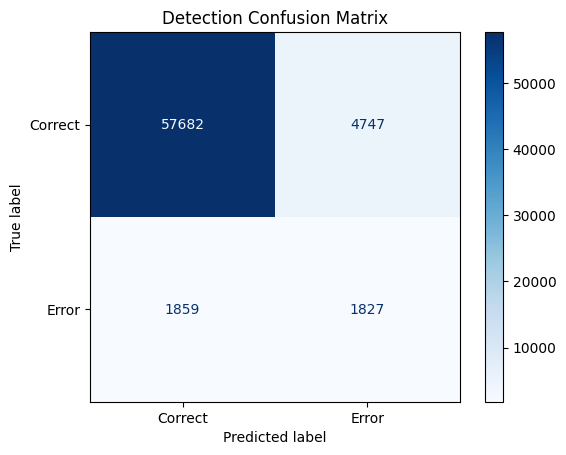


 Correction Results (on detected tokens):
Precision: 0.0000 | Recall: 0.0000 | F1: 0.0000


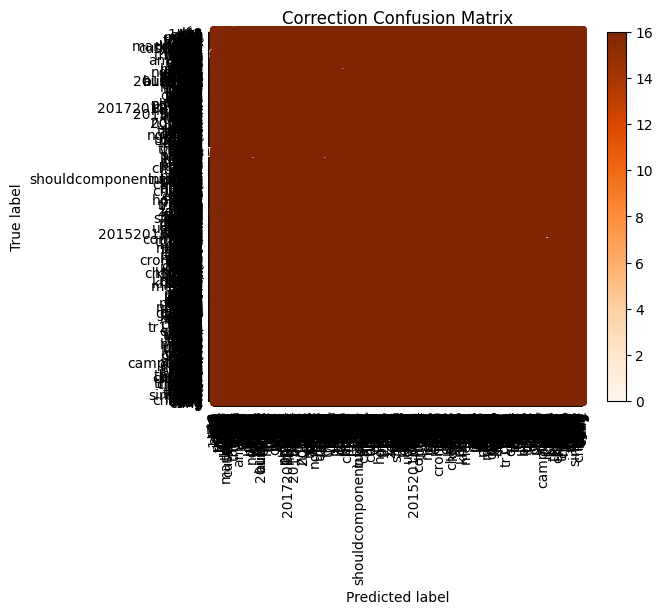


===== Các câu dự đoán sai =====

# 0
Predicted   : nhánh văn phòng sử dụng bóng sợi đốt có công suất > 60 w, tuân thủ đúng quyết định 04 / 2017 / qđ - tt.
Correct     : Khách sạn không sử dụng bóng sợi đốt có công suất > 60W, tuân thủ đúng Quyết định 04/2017/QĐ-TT.
Pred tokens : ['nhánh', 'văn', 'phòng', 'sử', 'dụng', 'bóng', 'sợi', 'đốt', 'có', 'công', 'suất', '', '60', 'w', '', 'tuân', 'thủ', 'đúng', 'quyết', 'định', '04', '', '2017', '', 'qđ', '', 'tt', '']
Gold tokens : ['khách', 'sạn', 'không', 'sử', 'dụng', 'bóng', 'sợi', 'đốt', 'có', 'công', 'suất', '', '60w', '', 'tuân', 'thủ', 'đúng', 'quyết', 'định', '04', '', '2017', '', 'qđ', '', 'tt', '']

# 1
Predicted   : mời các môn học khác nhau, người dùng có thể sửa đổi linh hoạt số lượng và tên các cặp giao diện veth thông qua một file txt.
Correct     : Với các mô hình khác nhau, người dùng có thể sửa đổi linh hoạt số lượng và tên các cặp giao diện veth thông qua một file txt.
Pred tokens : ['mời', 'các', 'môn', 'học', 'khác', 'nh

In [33]:
results = evaluate_corrections(test, save_path="test_with_prediction.csv")

print("=== Kết quả đánh giá ===")
print("🔍 Detection (Phát hiện lỗi):")
print(f"Precision: {results['detection']['precision']:.4f}")
print(f"Recall   : {results['detection']['recall']:.4f}")
print(f"F1       : {results['detection']['f1']:.4f}")

print("\n🛠️ Correction (Sửa lỗi):")
print(f"Precision: {results['correction']['precision']:.4f}")
print(f"Recall   : {results['correction']['recall']:.4f}")
print(f"F1       : {results['correction']['f1']:.4f}")